Instalación de paquetes

In [30]:
!pip install keras
!pip install keras_preprocessing

Importaciones

In [31]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, roc_auc_score
from keras_preprocessing.text import Tokenizer
from keras_preprocessing.sequence import pad_sequences
import keras
from sklearn.metrics import
from google.colab import drive

# **Preprocesamiento de datos**

Carga de datos

In [32]:
drive.mount('/content/drive')
file_path = '/content/drive/My Drive/IMDB Dataset SPANISH.csv'

df = pd.read_csv(file_path, encoding='utf-8')

print(df.head())

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
df.describe()

,Unnamed: 0
count,50000.000000
mean,24999.500000
std,14433.901067
min,0.000000
25%,12499.750000
50%,24999.500000
75%,37499.250000
max,49999.000000


Inicialización de las listas

In [ ]:
review = []
sentences = list(df['review_es'])
for sen in sentences:
  review.append(sen)

Creación de etiquetas

In [ ]:
labels = df['sentiment']
labels = np.array(list(map(lambda x: 1 if x=="positive" else 0, labels)))

División de datos de entrenamiento y prueba

In [ ]:
train_sentences, test_sentences, train_labels, test_labels = train_test_split(review, labels, test_size=0.2)

Parámetros de configuración

In [ ]:
vocab_size = 10000
max_length = 120
embedding_dim = 16
trunc_type='post'
oov_tok = "<OOV>"

Tokenización y acolchado de secuencias

In [ ]:
tokenizer = Tokenizer(num_words = vocab_size, oov_token=oov_tok)
tokenizer.fit_on_texts(train_sentences)
word_index = tokenizer.word_index

sequences = tokenizer.texts_to_sequences(train_sentences)
padded = pad_sequences(sequences,maxlen=max_length, truncating=trunc_type)

test_sequences = tokenizer.texts_to_sequences(test_sentences)
test_padded = pad_sequences(test_sequences,maxlen=max_length, truncating=trunc_type)

# **Modelo de clasificación**

Construcción del modelo

In [ ]:
model = keras.Sequential([
    keras.layers.Embedding(vocab_size, embedding_dim, input_length=max_length),
    keras.layers.Flatten(),
    keras.layers.Dense(64, activation='relu'),
    keras.layers.Dense(1, activation='sigmoid')
])

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Compilación del modelo

In [ ]:
model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ embedding (Embedding)                │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ ?                           │     0 (unbuilt) │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

Entrenamiento del modelo

Epoch 1/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 11s 7ms/step - accuracy: 0.6833 - loss: 0.5552 - val_accuracy: 0.8157 - val_loss: 0.4025
Epoch 2/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 9s 7ms/step - accuracy: 0.8986 - loss: 0.2521 - val_accuracy: 0.8134 - val_loss: 0.4484
Epoch 3/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 9s 6ms/step - accuracy: 0.9813 - loss: 0.0669 - val_accuracy: 0.7914 - val_loss: 0.7238
Epoch 4/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - accuracy: 0.9957 - loss: 0.0176 - val_accuracy: 0.7939 - val_loss: 0.9992
Epoch 5/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 13s 8ms/step - accuracy: 0.9986 - loss: 0.0062 - val_accuracy: 0.7906 - val_loss: 1.2167
Epoch 6/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 10s 8ms/step - accuracy: 0.9977 - loss: 0.0074 - val_accuracy: 0.7880 - val_loss: 1.4233
Epoch 7/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 10s 8ms/step - accuracy: 0.9921 - loss: 0.0205 - val_accuracy: 0.7834 - val_loss: 1.3469
Epoch 8/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 19s 7ms/step - accuracy: 0.9979 - loss: 0.0

<Axes: >

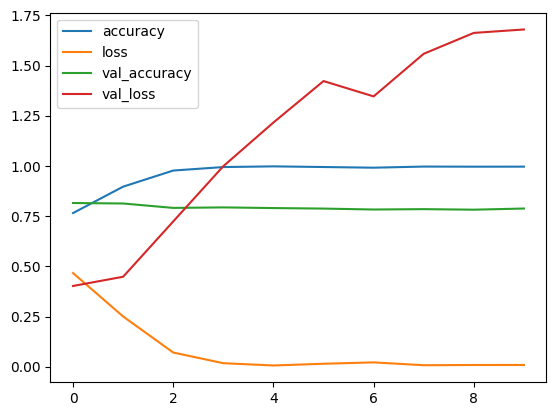

In [ ]:
history = model.fit(padded,
                    train_labels,
                    epochs=10, validation_data=(test_padded, test_labels))

pd.DataFrame(history.history).plot()

Predicciones y probabilidades

In [ ]:
test_pred_prob = model.predict(test_padded)
test_pred = (test_pred_prob > 0.5).astype("int32")  # Convertir probabilidades en predicciones binarias

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


# **Evaluación del modelo**

Matriz de confusión

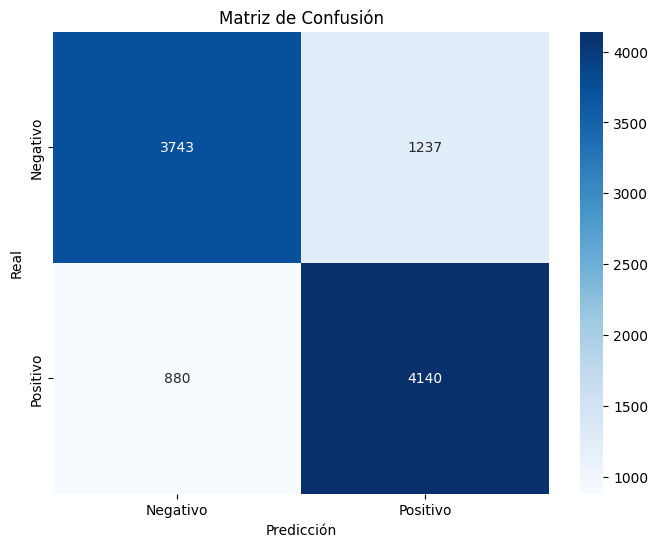

In [37]:
# Calcular la matriz de confusión
conf_matrix = confusion_matrix(test_labels, test_pred)

# Dibujar la matriz de confusión
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Negativo', 'Positivo'], yticklabels=['Negativo', 'Positivo'])
plt.xlabel('Predicción')
plt.ylabel('Real')
plt.title('Matriz de Confusión')
plt.show()


Reporte de clasificación

In [ ]:


# Generar y mostrar el reporte de clasificación
class_report = classification_report(test_labels, test_pred)
print('Classification Report:\n', class_report)


Classification Report:
               precision    recall  f1-score   support

           0       0.81      0.75      0.78      4980
           1       0.77      0.82      0.80      5020

    accuracy                           0.79     10000
   macro avg       0.79      0.79      0.79     10000
weighted avg       0.79      0.79      0.79     10000



Curva ROC y AUC

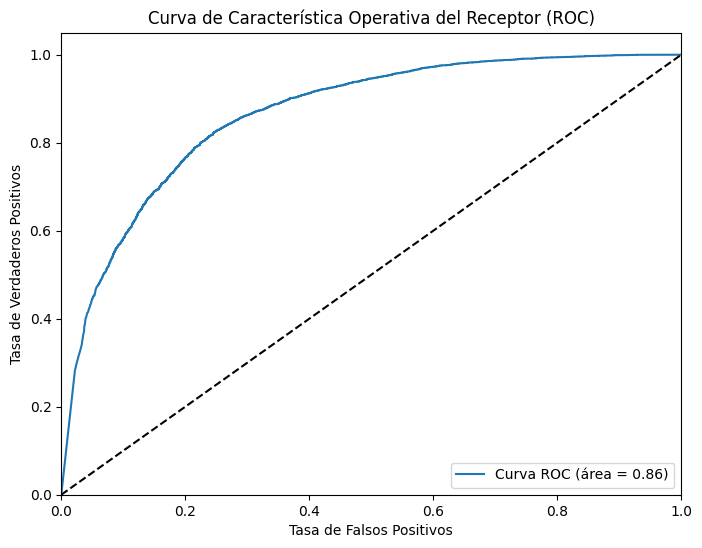

In [36]:
# Obtener probabilidades para la clase positiva
y_prob = test_pred_prob

# Calcular la curva ROC y el AUC
fpr, tpr, _ = roc_curve(test_labels, y_prob)
roc_auc = roc_auc_score(test_labels, y_prob)

# Dibujar la curva ROC
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'Curva ROC (área = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], 'k--')  # Diagonal
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Tasa de Falsos Positivos')
plt.ylabel('Tasa de Verdaderos Positivos')
plt.title('Curva de Característica Operativa del Receptor (ROC)')
plt.legend(loc='lower right')
plt.show()


Histograma de diferencias

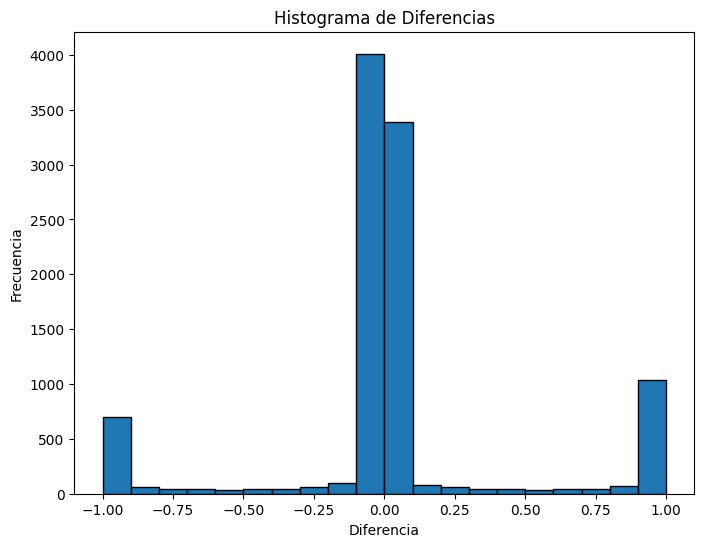

In [35]:
# Calcular las diferencias entre las probabilidades predichas y las etiquetas verdaderas
differences = y_prob.flatten() - test_labels

# Dibujar el histograma de diferencias
plt.figure(figsize=(8, 6))
plt.hist(differences, bins=20, edgecolor='k')
plt.xlabel('Diferencia')
plt.ylabel('Frecuencia')
plt.title('Histograma de Diferencias')
plt.show()
